# 🏠 Bangalore Ev Fiyat Tahmini - Machine Learning Projesi

Bu notebook, Bangalore şehrindeki evlerin fiyatlarını tahmin etmek için makine öğrenmesi modelinin geliştirilmesini içerir.

## 📋 Proje Adımları:
1. **Veri Yükleme ve Keşif** - CSV dosyasından veri okuma
2. **Veri Temizleme** - Eksik değerlerin ve outlier'ların temizlenmesi
3. **Feature Engineering** - Yeni özellikler oluşturma
4. **Model Eğitimi** - Linear Regression ile model eğitimi
5. **Model Değerlendirme** - Cross-validation ve GridSearchCV
6. **Model Kaydetme** - Pickle formatında model saklama

---

In [ ]:
# Gerekli kütüphaneleri import et
import pandas as pd  # Veri analizi ve DataFrame işlemleri için
import numpy as np   # Sayısal hesaplamalar için
import matplotlib.pyplot as plt  # Grafik çizimi için

plt.rcParams["figure.figsize"] = (15,10)
# Grafik boyutlarını ayarla (genişlik: 15, yükseklik: 10 inç)

## 1️⃣ Kütüphanelerin Import Edilmesi

Projede kullanılacak temel Python kütüphanelerini yüklüyoruz:
- **pandas**: Veri analizi ve manipülasyonu için
- **numpy**: Sayısal hesaplamalar için
- **matplotlib**: Veri görselleştirme için

In [ ]:
# CSV dosyasından Bangalore ev verilerini oku
# Bu veri seti ev fiyatları, lokasyon, alan, oda sayısı gibi bilgileri içeriyor

df = pd.read_csv("Bengaluru_House_Data.csv")df.head()

# İlk 5 satırı görüntüle (veri yapısını anlamak için)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 2️⃣ Veri Yükleme ve İlk Keşif

CSV dosyasından Bangalore ev verilerini okuyoruz. Bu dataset şu bilgileri içerir:
- **location**: Evin bulunduğu semt/mahalle
- **size**: Oda sayısı (örn: "2 BHK")
- **total_sqft**: Toplam metrekare
- **bath**: Banyo sayısı
- **price**: Fiyat (Lakh cinsinden)

In [ ]:
# Alan türlerine göre gruplama yap ve her kategoride kaç ev olduğunu say

# (Super built-up Area, Built-up Area, Plot Area, Carpet Area gibi)df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
# Modelde kullanılmayacak gereksiz kolonları çıkar
# area_type, society, balcony, availability kolonları fiyat tahmini için önemli değil

df1 = df.drop(["area_type", "society", "balcony", "availability"], axis='columns')df1.head()

# Temizlenmiş veriyi görüntüle

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
# Her kolondaki eksik (null/NaN) değerlerin sayısını kontrol et

# Eksik verileri tespit etmek için önemli bir adımdf1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
# Eksik değer içeren satırları kaldır (Data Cleaning)
# dropna() metodu NaN içeren tüm satırları siler

df2 = df1.dropna()df2.isnull().sum()

# Temizleme sonrası eksik değerleri tekrar kontrol et (hepsi 0 olmalı)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df2.shape

(13246, 5)

In [8]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df2["bhk"] = df2["size"].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\musta\AppData\Local\Temp\ipykernel_19868\1074732221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"] = df2["size"].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [11]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)

    except:
        return False
    return True

In [14]:
df2[~df2["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x) 
    except:
        return None

In [16]:
convert_sqft_to_num("2100-2850")

2475.0

In [17]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df3.loc[25]

location      Mangammanapalya
size                    3 BHK
total_sqft             1250.0
bath                      3.0
price                    56.0
bhk                         3
Name: 25, dtype: object

In [19]:
df4 = df3.copy()
df4["price_per_sqft"] = df4["price"] * 100000 / df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
df.location.unique()
print(len(df.location.unique()))

1306


In [21]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1052

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [24]:
len(df4.location.unique())

1293

In [25]:
df4.location = df4.location.apply((lambda x: "other" if x in location_stats_less_than_10 else x))
len(df4.location.unique())

242

In [26]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [27]:
df4.shape

(13246, 7)

In [28]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [29]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)

    return df_out 

df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

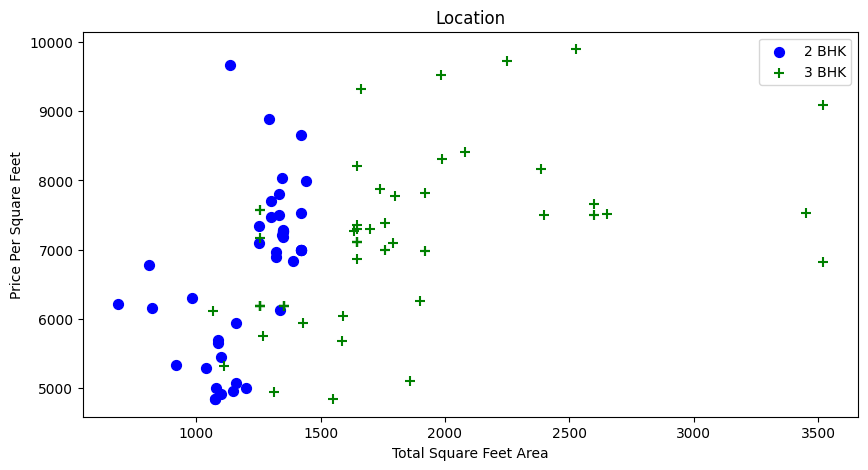

In [31]:
## İki yatak odalı veya üç yatak odalı dairelerin fiyatlarının görselleştirilmesi
import matplotlib


def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (10,5)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = "blue", label = "2 BHK", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker="+", color = "green", label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title("Location")
    plt.legend()

plot_scatter_chart(df6, "Hebbal")

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values
                )

    return df.drop(exclude_indices, axis='index')


df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

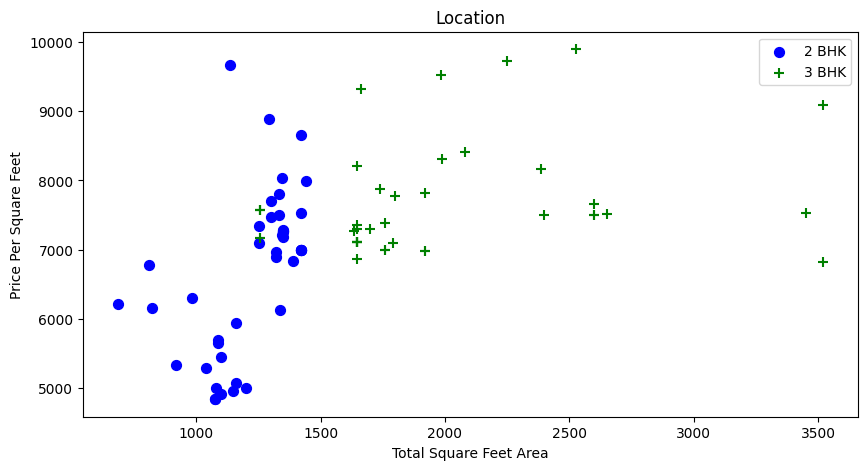

In [33]:
plot_scatter_chart(df7, "Hebbal")

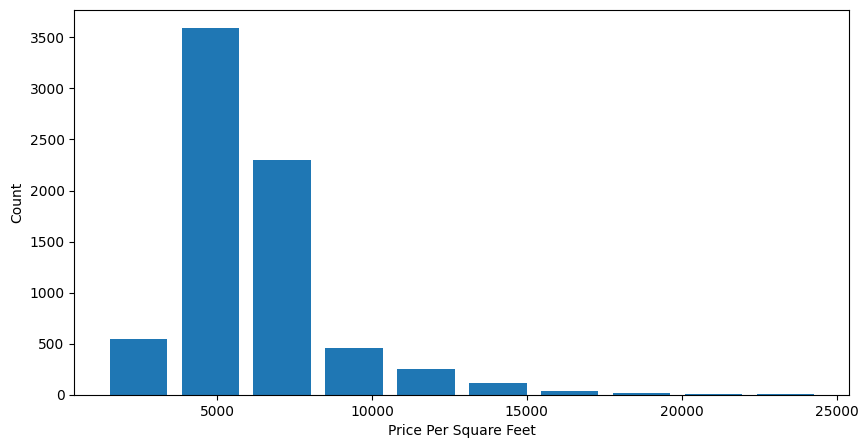

In [34]:
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [35]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
df7[df.bath>10]

C:\Users\musta\AppData\Local\Temp\ipykernel_19868\227622792.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df7[df.bath>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
938,Bannerghatta Road,2 BHK,1200.0,2.0,78.00,2,6500.000000
1078,Begur Road,2 BHK,1200.0,2.0,44.00,2,3666.666667
1718,Dasanapura,3 BHK,1286.0,2.0,68.00,3,5287.713841
1768,Devarachikkanahalli,2 BHK,947.0,2.0,43.00,2,4540.654699
1953,Electronic City,3 BHK,1563.0,3.0,91.84,3,5875.879718
1979,Electronic City,2 BHK,1128.0,2.0,65.50,2,5806.737589
3096,Hennur Road,3 BHK,2264.0,3.0,168.00,3,7420.494700
4684,Kudlu Gate,3 BHK,1535.0,3.0,85.00,3,5537.459283
6937,Uttarahalli,2 BHK,1025.0,2.0,35.88,2,3500.487805
8106,other,3 BHK,1976.0,3.0,184.00,3,9311.740891


Text(0, 0.5, 'Count')

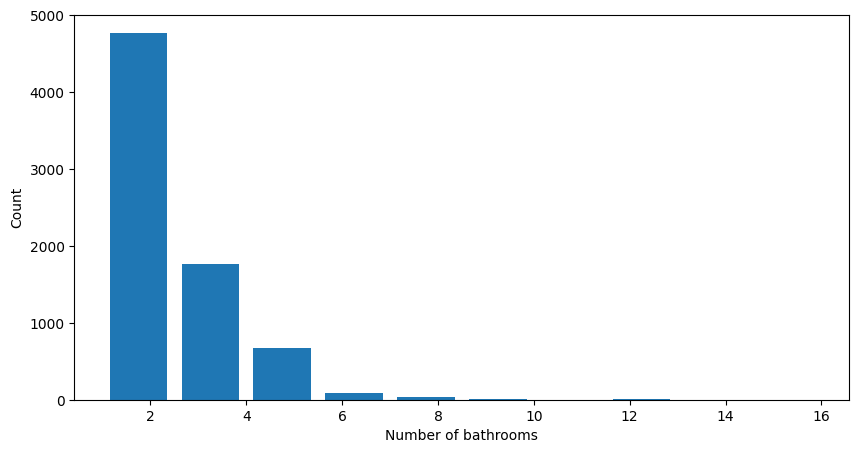

In [37]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [38]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
df8 = df7[df7.bath<=df7.bhk+2]
df8.shape

(7325, 7)

In [40]:
df9 = df8.drop(["size", "price_per_sqft"], axis = "columns")
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [41]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df10 = pd.concat([df9, dummies.drop("other", axis = "columns")], axis = "columns")
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df11 = df10.drop("location", axis = "columns")
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X = df11.drop("price", axis = "columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8017674308564025

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'absolute_error'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.835319,{'fit_intercept': False}
1,lasso,0.684331,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.747179,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [58]:
def predict_price(location_list):
    loc_index = np.where(X.columns==location_list[0])
    
    X_pred = np.zeros(len(X.columns))
    X_pred[0] = location_list[1]
    X_pred[1] = location_list[2]
    X_pred[2] = location_list[3]
    
    if len(loc_index[0]) > 0:
        X_pred[loc_index[0][0]] = 1
    
    return lr_clf.predict([X_pred])[0]

In [61]:
predict_price(["1st Phase JP Nagar", 1000,2,2])

c:\Users\musta\Desktop\estate price prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(82.97934524846706)

In [62]:
predict_price(["1st Phase JP Nagar", 1000,2,3])

c:\Users\musta\Desktop\estate price prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(76.66814081954946)

In [63]:
predict_price(["Indira Nagar",1000,2,2])

c:\Users\musta\Desktop\estate price prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(183.8432444202959)

In [64]:
predict_price(["Indira Nagar",1000,3,3])

c:\Users\musta\Desktop\estate price prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(178.76514498043463)

In [ ]:
import pickle 
with open("banglore_home_prices_model.pickle", "wb") as f:
    pickle.dump(lr_clf, f)



In [ ]:
import json 
columns = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

: 